### Machine Learning in Finance - Project 1 Part 2

MUQING WEN - mw3821

Technical and Fundamental analysis

Step1: Each team needs to choose 1 company manually from each sector of S&P500.

Step2: Please choose 5 indicators for technical analysis and at least 7 indicators for fundamental analysis (Indicators from what we learned in class) from quarterly financial statements.

Step3: Please analyze one company in terms of fundamental and technical perspectives 
- Technical analysis: Daily based analysis
- Fundamental analysis: Quarterly based analysis
- Technical analysis and Fundamental analysis need to be interconnected in your analysis.
- January 2018 to December 2022 (Covid period) & January 2007 to December 2010 (Economic crisis)
 To begin with, please download the daily stock data and quarterly & annual financial statements. 

Your PPT includes 1) Technical analysis 2) Fundamental analysis 3) Corresponding economic events 4) Overview of the company and S&P500 sector overview etc. with 25-35 slides. Slides needs to be explained in 15-20 minutes with key points (not reading all sentences).  

Submission: 1) Python code (both code and its html file), 2) any imported data in the code, 3) all financial statements, and 4) PPT as a zip file (Filename format: TeamNUM_Firstname_Lastname_UID.zip ) Each team will give a presentation in the classroom on March 25th, 2025 (TUE). 

In [1]:
import os
import pandas as pd

def load_csvs_to_dict(folder_name):
    data_dict = {}
    
    # Ensure the folder exists
    if not os.path.exists(folder_name):
        print(f"Error: Folder '{folder_name}' does not exist.")
        return data_dict

    # Iterate through the files in the folder
    for file in os.listdir(folder_name):
        if file.endswith(".csv"):  # Ensure only CSV files are processed
            file_path = os.path.join(folder_name, file)
            df_name = os.path.splitext(file)[0]  # Extract name without extension
            data_dict[df_name] = pd.read_csv(file_path, index_col=0)  # Read CSV with index
            
    return data_dict

# Test Code
folder = "2018_to_2024"
data_frames1 = load_csvs_to_dict(folder)

# Print the names of the DataFrames
print("Loaded DataFrames:", list(data_frames1.keys()))

# Display the first 5 rows and first 10 columns of each DataFrame
for name, df in data_frames1.items():
    print(f"\nDataFrame: {name}")
    display(df.iloc[:5, :5])  # Display first 5 rows and first 5 columns

Loaded DataFrames: ['Close', 'High', 'Low', 'Open', 'Volume']

DataFrame: Close


Apple Inc.   Accenture  Adobe Inc.  Analog Devices    Autodesk
Date                                                                      
2018-01-02   40.479851  138.659622  177.699997       78.786263  107.120003
2018-01-03   40.472790  139.299561  181.039993       79.763664  109.379997
2018-01-04   40.660782  140.948975  183.220001       79.676407  112.070000
2018-01-05   41.123726  142.111710  185.339996       79.999306  110.839996
2018-01-08   40.970974  143.247391  185.039993       80.138916  111.419998


DataFrame: High


Apple Inc.   Accenture  Adobe Inc.  Analog Devices    Autodesk
Date                                                                      
2018-01-02   40.489252  138.893975  177.800003       79.109159  107.160004
2018-01-03   41.017975  139.696145  181.889999       79.946928  109.779999
2018-01-04   40.764179  141.381606  184.059998       80.531637  112.209999
2018-01-05   41.210672  142.156779  185.899994       80.522917  113.349998
2018-01-08   41.267063  143.319498  185.600006       80.470535  111.739998


DataFrame: Low


Apple Inc.   Accenture  Adobe Inc.  Analog Devices    Autodesk
Date                                                                      
2018-01-02   39.774873  137.704221  175.259995       77.608135  104.389999
2018-01-03   40.409344  137.893498  177.699997       78.585537  106.989998
2018-01-04   40.437540  139.497843  181.639999       79.632770  109.230003
2018-01-05   40.665491  140.723677  183.539993       79.266251  110.410004
2018-01-08   40.872274  141.363627  183.830002       79.728752  109.040001


DataFrame: Open


Apple Inc.   Accenture  Adobe Inc.  Analog Devices    Autodesk
Date                                                                      
2018-01-02   39.986368  138.353175  175.850006       77.878666  105.339996
2018-01-03   40.543288  137.893498  178.000000       78.786252  107.000000
2018-01-04   40.545634  139.705144  181.929993       80.173839  110.129997
2018-01-05   40.757138  141.156309  185.000000       79.868401  113.070000
2018-01-08   40.970974  141.841328  184.949997       80.121459  110.419998


DataFrame: Volume


Apple Inc.  Accenture  Adobe Inc.  Analog Devices  Autodesk
Date                                                                   
2018-01-02   102223600    3061900     2432800         2343200   2040600
2018-01-03   118071600    2064200     2561200         2009600   1953800
2018-01-04    89738400    1777000     2211400         1879600   2158700
2018-01-05    94640000    1597600     2376500         1799100   2384200
2018-01-08    82271200    2616900     2088000         1907400   1782100

In [5]:
import pandas as pd

def combine_columns_from_df_dict(df_dict, n=0):
    """
    Combine the ith column from each DataFrame in df_dict into a new DataFrame.
    
    Parameters:
    - df_dict (dict of pd.DataFrame): Dictionary of dataframes with the same shape.
    - n (int): Number of columns to iterate over. If 0, use all columns.

    Returns:
    - result_dict (dict of pd.DataFrame): Dictionary with column names as keys and
      DataFrames with ith columns from all input DataFrames as values.
    """
    # Assume all dataframes have the same shape and columns
    first_df = next(iter(df_dict.values()))
    total_cols = len(first_df.columns)
    n = total_cols if n == 0 else min(n, total_cols)

    result_dict = {}

    for i in range(n):
        col_name = first_df.columns[i]
        combined_df = pd.DataFrame({
            key: df.iloc[:, i] for key, df in df_dict.items()
        })
        result_dict[col_name] = combined_df

    return result_dict

data_frames2 = combine_columns_from_df_dict(data_frames1, n=1)

for name, df in data_frames2.items():
    print(f"\nDataFrame: {name}")
    display(df.iloc[:5, :5])  # Display first 5 rows and first 5 columns


DataFrame: Apple Inc.


Close       High        Low       Open     Volume
Date                                                             
2018-01-02  40.479851  40.489252  39.774873  39.986368  102223600
2018-01-03  40.472790  41.017975  40.409344  40.543288  118071600
2018-01-04  40.660782  40.764179  40.437540  40.545634   89738400
2018-01-05  41.123726  41.210672  40.665491  40.757138   94640000
2018-01-08  40.970974  41.267063  40.872274  40.970974   82271200

In [11]:
def save_df_dict_to_csv(df_dict, folder_name):
    """
    Save each DataFrame in df_dict to a CSV file in the specified folder.
    
    Parameters:
    - df_dict (dict of pd.DataFrame): Dictionary with DataFrames as values.
    - folder_name (str): Folder where CSV files will be saved.
    """
    # Create the folder if it doesn't exist
    os.makedirs(folder_name, exist_ok=True)
    
    # Save each DataFrame as a CSV file
    for name, df in df_dict.items():
        file_path = os.path.join(folder_name, f"{name}.csv")
        df.to_csv(file_path, index=True)


save_df_dict_to_csv(data_frames2, "2018_to_2024_by_companies")

In [12]:
# Test Code
folder = "2018_to_2024_by_companies"
data_frames3 = load_csvs_to_dict(folder)

# Print the names of the DataFrames
print("Loaded DataFrames:", list(data_frames3.keys()))

# Display the first 5 rows and first 10 columns of each DataFrame
for name, df in data_frames3.items():
    print(f"\nDataFrame: {name}")
    display(df.iloc[:5, :5])  # Display first 5 rows and first 5 columns

Loaded DataFrames: ['Apple Inc.']

DataFrame: Apple Inc.


Close       High        Low       Open     Volume
Date                                                             
2018-01-02  40.479851  40.489252  39.774873  39.986368  102223600
2018-01-03  40.472790  41.017975  40.409344  40.543288  118071600
2018-01-04  40.660782  40.764179  40.437540  40.545634   89738400
2018-01-05  41.123726  41.210672  40.665491  40.757138   94640000
2018-01-08  40.970974  41.267063  40.872274  40.970974   82271200

In [60]:
apple_df = data_frames3['Apple Inc.']

apple_df.index = pd.to_datetime(apple_df.index)
print(apple_df.index)

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2018-01-16',
               ...
               '2024-12-16', '2024-12-17', '2024-12-18', '2024-12-19',
               '2024-12-20', '2024-12-23', '2024-12-24', '2024-12-26',
               '2024-12-27', '2024-12-30'],
              dtype='datetime64[ns]', name='Date', length=1760, freq=None)


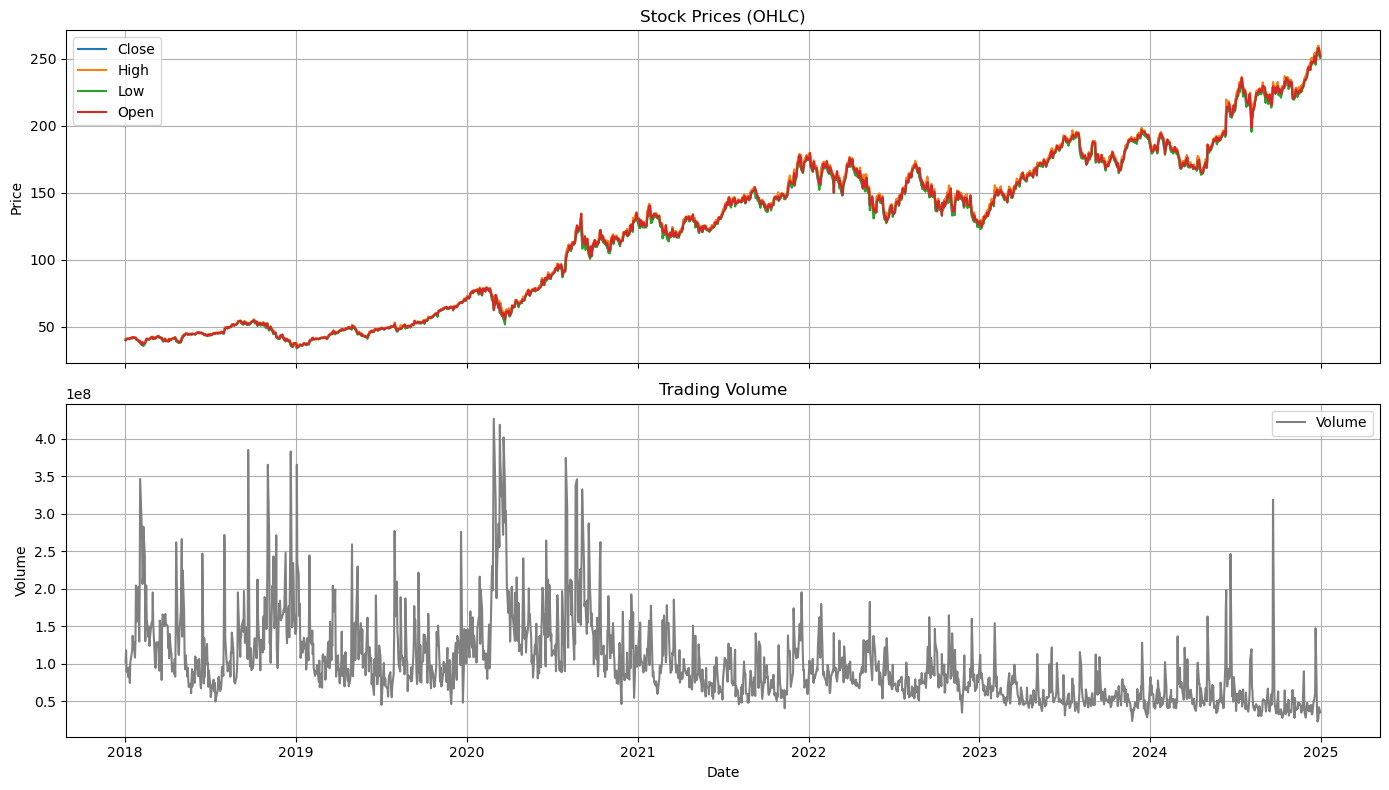

In [18]:
import matplotlib.pyplot as plt

def plot_stock_data(df):
    """
    Plots OHLC data and Volume data from a stock DataFrame.

    Parameters:
    - df (pd.DataFrame): A DataFrame with columns ["Close", "High", "Low", "Open", "Volume"]
                         and datetime index.
    """
    fig, ax1 = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

    # Plot Close, High, Low, Open
    ax1[0].plot(df.index, df["Close"], label="Close")
    ax1[0].plot(df.index, df["High"], label="High")
    ax1[0].plot(df.index, df["Low"], label="Low")
    ax1[0].plot(df.index, df["Open"], label="Open")
    ax1[0].set_ylabel("Price")
    ax1[0].set_title("Stock Prices (OHLC)")
    ax1[0].legend()
    ax1[0].grid(True)

    # Plot Volume
    ax1[1].plot(df.index, df["Volume"], color='gray', label="Volume")
    ax1[1].set_ylabel("Volume")
    ax1[1].set_title("Trading Volume")
    ax1[1].legend()
    ax1[1].grid(True)

    plt.xlabel("Date")
    plt.tight_layout()
    plt.show()

plot_stock_data(apple_df)

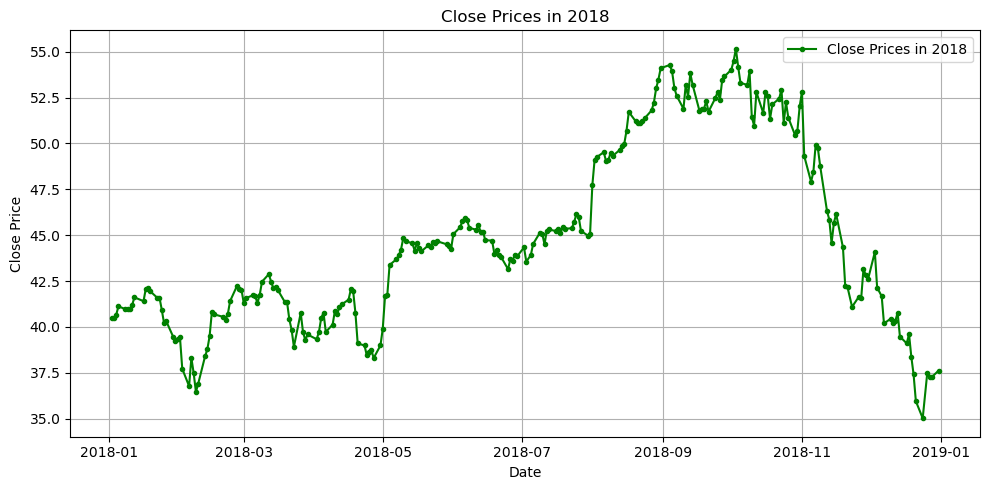

In [22]:
import pandas as pd

def filter_close_by_year(df, year):
    """
    Filters the 'Close' column of a DataFrame for the specified year.

    Parameters:
    - df (pd.DataFrame): DataFrame with a DateTime index and a 'Close' column.
    - year (str): A string representing the year to filter by (e.g., '2018').

    Returns:
    - pd.Series: Filtered 'Close' values for the specified year.
    """
    if not isinstance(df.index, pd.DatetimeIndex):
        raise ValueError("DataFrame index must be a DateTimeIndex.")

    try:
        year_int = int(year)
    except ValueError:
        raise ValueError(f"Invalid year: {year}. Must be a 4-digit number string.")

    return df[df.index.year == year_int]["Close"]

# Test the function
year = "2018"
filtered_close = filter_close_by_year(apple_df, year)

# Plot the result
plt.figure(figsize=(10, 5))
plt.plot(filtered_close.index, filtered_close.values, color="green", marker='.', label=f"Close Prices in {year}")
plt.title(f"Close Prices in {year}")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [25]:
type(filtered_close.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [83]:
def find_extrema_points(series, window_size):
    """
    Finds indices where the middle value of each window is equal to the max or min.

    Parameters:
    - series (pd.Series): Time series data with a DateTimeIndex.
    - window_size (int): Size of each sliding window.

    Returns:
    - (list, list): Tuple of two lists containing the indices of local maxima and minima.
    """
    if not isinstance(series.index, pd.DatetimeIndex):
        raise ValueError("The input series must have a DateTimeIndex.")
    if window_size < 1:
        raise ValueError("Window size must be at least 1.")

    max_indices = []
    min_indices = []

    for i in range(0, len(series) - window_size + 1):
        window = series.iloc[i:i + window_size]
        mid_idx = i + window_size // 2  # choose first middle value if even
        mid_value = series.iloc[mid_idx]
        window_max = window.max()
        window_min = window.min()
        mid_timestamp = series.index[mid_idx]

        if mid_value == window_max:
            max_indices.append(mid_timestamp)
        elif mid_value == window_min:
            min_indices.append(mid_timestamp)

    return max_indices, min_indices

# Test the function
year = "2023"
close_df = filter_close_by_year(apple_df, year)

close_df = apple_df['Close']

window_size = 50
max_pts, min_pts = find_extrema_points(close_df, window_size)

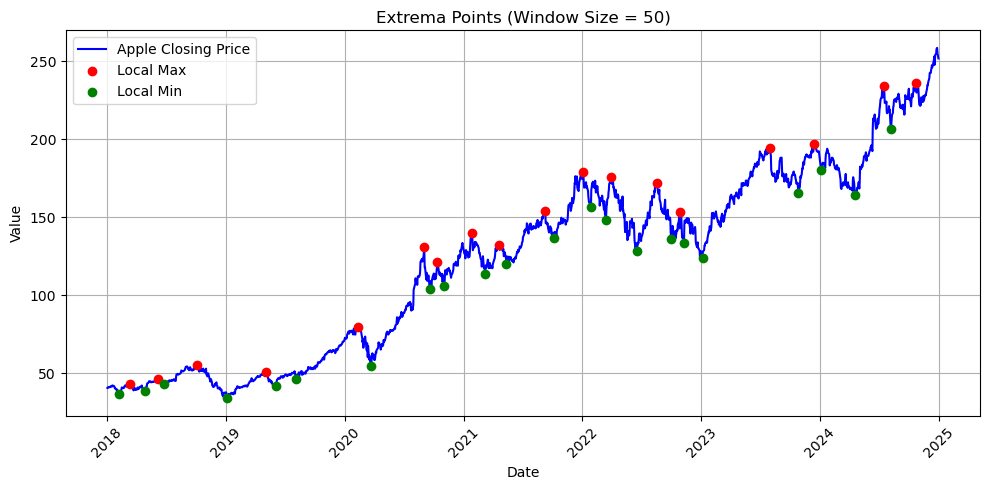

In [85]:
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(close_df.index, close_df.values, label="Apple Closing Price", color='blue')
plt.scatter(max_pts, close_df[max_pts], color='red', label='Local Max', zorder=5)
plt.scatter(min_pts, close_df[min_pts], color='green', label='Local Min', zorder=5)

title = f"Extrema Points (Window Size = {window_size})"
plt.title(title)
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(title, dpi=300, bbox_inches='tight')
plt.show()

### Most Important Indicators

#### Top 5 Technical Indicators  
1. Exponential Moving Average (EMA) – More responsive than SMA and helps track price trends efficiently.  
2. Relative Strength Index (RSI) – Measures momentum and identifies overbought/oversold conditions.  
3. Moving Average Convergence Divergence (MACD) – Analyzes trend strength and potential reversals.  
4. Average True Range (ATR) – Measures market volatility, useful during crises.  
5. On-Balance Volume (OBV) – Tracks volume flow to confirm trends and potential reversals.  

#### Top 7 Financial Indicators  
1. Return on Equity (ROE) – Evaluates profitability and management efficiency.  
2. Price-to-Book Ratio (PBR) – Measures market valuation relative to the company's book value.  
3. Price-to-Earnings Ratio (P/E Ratio) – Assesses stock valuation based on earnings.  
4. Earnings Per Share (EPS) – Key profitability metric for investors.  
5. Profit Margin on Sales – Shows how much profit a company retains per dollar of revenue.  
6. Current Ratio – Assesses short-term liquidity and financial stability.  
7. Total Asset Turnover Ratio – Measures how efficiently a company uses assets to generate revenue.  

These indicators provide a comprehensive view of a company's stock price movement (technical) and financial health (fundamental), ensuring a well-rounded analysis for both crisis periods.


In [2]:
close_df = data_frames1["Close"]

In [3]:
num_rows_with_nans = close_df.isna().any(axis=1).sum()
print("Number of rows with NaN values:", num_rows_with_nans)

Number of rows with NaN values: 0


In [4]:
missing_indexes = close_df[close_df.isnull().any(axis=1)].index
print(missing_indexes)

Index([], dtype='object', name='Date')


## Compute Technical Indicators
1. Exponential Moving Average (EMA) – More responsive than SMA and helps track price trends efficiently.  
2. Relative Strength Index (RSI) – Measures momentum and identifies overbought/oversold conditions.  
3. Moving Average Convergence Divergence (MACD) – Analyzes trend strength and potential reversals.  
4. Average True Range (ATR) – Measures market volatility, useful during crises.  
5. On-Balance Volume (OBV) – Tracks volume flow to confirm trends and potential reversals.  

In [5]:
def calculate_daily_returns(close_df):
    daily_returns = close_df.pct_change()

    return daily_returns

daily_returns_df = calculate_daily_returns(close_df)
print(daily_returns_df.shape)
num_rows_with_nans = daily_returns_df.isna().any(axis=1).sum()
print("Number of rows with NaN values:", num_rows_with_nans)

(1259, 67)
Number of rows with NaN values: 1


In [6]:
def calculate_ema(close_df, span=30):
    ema_df = close_df.ewm(span=span, adjust=False).mean()  # Compute EMA using exponential weighting
    return ema_df

ema_df = calculate_ema(close_df, span=30)
print(ema_df.shape)
num_rows_with_nans = ema_df.isna().any(axis=1).sum()
print("Number of rows with NaN values:", num_rows_with_nans)

(1259, 67)
Number of rows with NaN values: 0


In [7]:
def calculate_rsi(close_df, window=14):
    """
    Calculate the Relative Strength Index (RSI) for each stock.
    """
    return_df = close_df.pct_change()
    
    # Separate gains and losses
    gains = return_df.where(return_df > 0, 0)  # Keep only positive returns
    losses = -return_df.where(return_df < 0, 0)  # Convert negative returns to positive for averaging

    # Compute moving averages of gains and losses
    avg_gain = gains.rolling(window=window).mean()
    avg_loss = losses.rolling(window=window).mean()

    # Compute Relative Strength (RS)
    rs = avg_gain / avg_loss

    # Compute RSI
    rsi = 100 - (100 / (1 + rs))

    return rsi

rsi_df = calculate_rsi(close_df, window=14)
print(rsi_df.shape)

# Count rows with NaN values
num_rows_with_nans = rsi_df.isna().any(axis=1).sum()
print(f"Number of rows with NaN values in RSI: {num_rows_with_nans}")

(1259, 67)
Number of rows with NaN values in RSI: 13


In [8]:
def calculate_macd(close_df, short_window=25, long_window=50):
    """
    Calculate the MACD (Moving Average Convergence/Divergence) for each stock.
    """
    short_ma = calculate_ema(close_df, span=short_window)  # Short-term EMA
    long_ma = calculate_ema(close_df, span=long_window)  # Long-term EMA

    macd = short_ma - long_ma  # MACD formula
    return macd

# Example usage
macd_df = calculate_macd(close_df, short_window=12, long_window=26)

# Print number of rows with NaN values
num_rows_with_nans = macd_df.isna().any(axis=1).sum()
print(f"Number of rows with NaN values in MACD: {num_rows_with_nans}")

print(macd_df.shape)

Number of rows with NaN values in MACD: 0
(1259, 67)


In [9]:
def calculate_atr(close_df, high_df, low_df, window=14):
    # Previous day's close
    previous_close = close_df.shift(1)

    if isinstance(close_df, pd.DataFrame):
        # Handle multiple stocks (DataFrame input)
        tr = pd.DataFrame({
            ticker: pd.concat([
                (high_df[ticker] - low_df[ticker]),               # H - L
                (high_df[ticker] - previous_close[ticker]).abs(), # |H - Cp|
                (low_df[ticker] - previous_close[ticker]).abs()   # |L - Cp|
            ], axis=1).max(axis=1)  # Max of the three per row, maintaining stock structure
            for ticker in close_df.columns  # Iterate over each stock ticker
        }, index=close_df.index)  # Keep original date index

    elif isinstance(close_df, pd.Series):
        # Handle a single stock (Series input)
        tr = pd.concat([
            (high_df - low_df),               # H - L
            (high_df - previous_close).abs(), # |H - Cp|
            (low_df - previous_close).abs()   # |L - Cp|
        ], axis=1).max(axis=1)  # Max of the three per row

    else:
        raise TypeError("Input data must be either a DataFrame (multiple stocks) or a Series (single stock).")

    # Compute ATR using a rolling mean
    atr = tr.rolling(window=window).mean()

    return atr

# Example usage
atr_df = calculate_atr(close_df, data_frames1["High"], data_frames1["Low"], window=14)
print(atr_df.shape)

num_rows_with_nans = atr_df.isna().any(axis=1).sum()
print("Number of rows with NaN values:", num_rows_with_nans)

(1259, 67)
Number of rows with NaN values: 13


In [10]:
def calculate_obv(close_df, volume_df):
    """
    Calculate On-Balance Volume (OBV).
    """
    obv = volume_df.copy()
    obv.iloc[0] = 0  # Start OBV at zero
    obv[close_df > close_df.shift(1)] = volume_df  # Add volume if price increases
    obv[close_df < close_df.shift(1)] = -volume_df  # Subtract volume if price decreases
    obv[close_df == close_df.shift(1)] = 0  # No change if price is the same
    obv = obv.cumsum()
    return obv


obv_df = calculate_obv(close_df, data_frames1["Volume"])
print(obv_df.shape)

num_rows_with_nans = obv_df.isna().any(axis=1).sum()
print("Number of rows with NaN values:", num_rows_with_nans)

(1259, 67)
Number of rows with NaN values: 0


In [11]:
type(data_frames1["Close"])

pandas.core.frame.DataFrame

In [12]:
import pandas as pd

def compute_technical_indicators(data_frames1, column_name):
    """
    Compute technical indicators for a specific stock (column_name) from the given DataFrames.

    Parameters:
    data_frames1 (dict): Dictionary containing 'Close', 'High', 'Low', and 'Volume' DataFrames.
    column_name (str): The specific stock column to calculate indicators for.

    Returns:
    pd.DataFrame: DataFrame containing the stock's Close, High, Low, Volume, EMA, RSI, MACD, ATR, and OBV.
    """
    # Extract relevant columns for the selected stock
    close_prices = data_frames1["Close"][column_name]
    high_prices = data_frames1["High"][column_name]
    low_prices = data_frames1["Low"][column_name]
    volume_data = data_frames1["Volume"][column_name]

    # Compute technical indicators
    ema = calculate_ema(close_prices)
    rsi = calculate_rsi(close_prices)
    macd = calculate_macd(close_prices)
    atr = calculate_atr(close_prices, high_prices, low_prices)
    obv = calculate_obv(close_prices, volume_data)

    # Combine into a single DataFrame
    result_df = pd.DataFrame({
        "Close": close_prices,
        "High": high_prices,
        "Low": low_prices,
        "Volume": volume_data,
        "EMA": ema,
        "RSI": rsi,
        "MACD": macd,
        "ATR": atr,
        "OBV": obv
    })

    return result_df

# Example usage
selected_stock = "Apple Inc."  # Example column name
technical_indicators_df = compute_technical_indicators(data_frames1, selected_stock)

technical_indicators_df

Close        High         Low     Volume         EMA  \
Date                                                                    
2018-01-02   40.479839   40.489241   39.774861  102223600   40.479839   
2018-01-03   40.472794   41.017978   40.409348  118071600   40.479385   
2018-01-04   40.660789   40.764187   40.437547   89738400   40.491088   
2018-01-05   41.123714   41.210661   40.665479   94640000   40.531903   
2018-01-08   40.970970   41.267060   40.872270   82271200   40.560230   
...                ...         ...         ...        ...         ...   
2022-12-23  130.344467  130.898028  128.149982   63814900  139.442686   
2022-12-27  128.535522  129.899667  127.240581   69007800  138.738998   
2022-12-28  124.591377  129.524023  124.423333   85438400  137.826248   
2022-12-29  128.120346  128.980342  126.261956   75703700  137.200061   
2022-12-30  128.436646  128.456420  125.965387   77034200  136.634679   

                  RSI      MACD       ATR         OBV  
Date                                                   
2018-01-02        NaN  0.000000       NaN           0  
2018-01-03        NaN -0.000266       NaN  -118071600  
2018-01-04        NaN  0.006588       NaN   -28333200  
2018-01-05        NaN  0.030103       NaN    66306800  
2018-01-08        NaN  0.045107       NaN   -15964400  
...               ...       ...       ...         ...  
2022-12-23  26.666385 -3.116506  4.338838  2102404200  
2022-12-27  28.124331 -3.374993  4.180675  2033396400  
2022-12-28  26.031281 -3.742782  4.307063  1947958000  
2022-12-29  30.954196 -3.924607  4.438391  2023661700  
2022-12-30  32.096461 -4.062098  4.286584  2100695900  

[1259 rows x 9 columns]

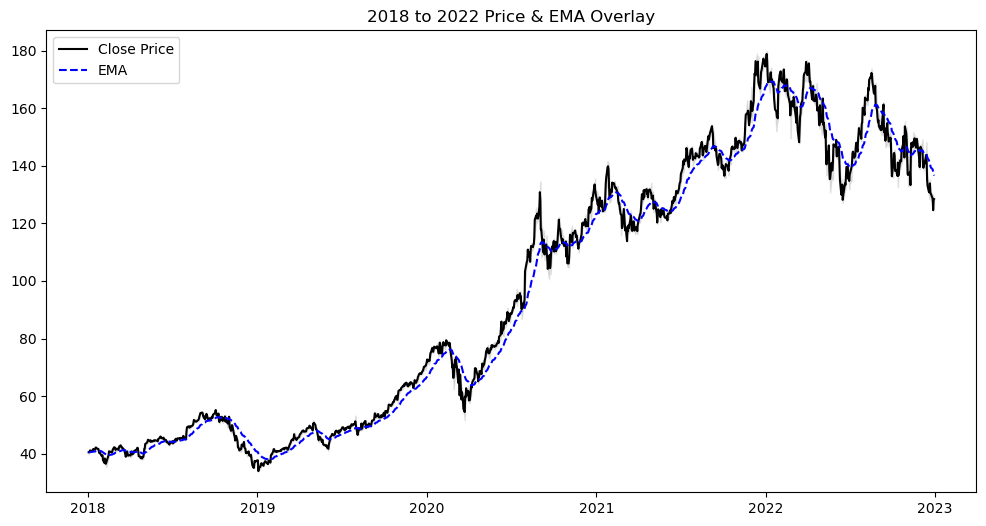

In [13]:
import matplotlib.pyplot as plt

df = technical_indicators_df

df.index = pd.to_datetime(df.index)

plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Close"], label="Close Price", color="black")
plt.plot(df.index, df["EMA"], label="EMA", linestyle="--", color="blue")

plt.fill_between(df.index, df["High"], df["Low"], color="gray", alpha=0.2)  # High-Low range
plt.legend()

title = '2018 to 2022 Price & EMA Overlay'
plt.title(title)
plt.savefig(title, dpi=300, bbox_inches='tight')
plt.show()

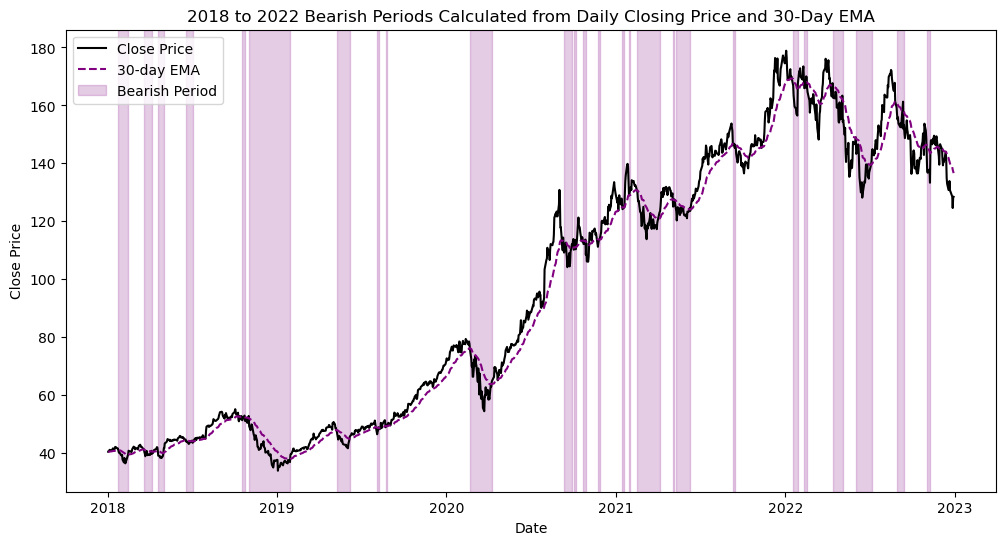

In [14]:
def find_bearish_periods(df, ema_window=30, min_period=3):
    """
    Identify bearish periods based on death crosses (price crosses below EMA)
    and golden crosses (price crosses above EMA). Both bearish and non-bearish 
    periods must last more than the minimum period threshold to be counted.
    """
    df['Signal'] = df['Close'] > df['EMA']
    
    bearish_periods = []
    in_bearish = False
    start_date = None
    last_end_date = None
    
    for i in range(1, len(df)):
        if not df['Signal'].iloc[i] and df['Signal'].iloc[i-1]:  # Death cross (bearish start)
            if last_end_date and (df.index[i] - last_end_date).days < min_period:
                # If the non-bearish period is too short, merge the bearish periods
                bearish_periods[-1] = (bearish_periods[-1][0], df.index[i])
            else:
                start_date = df.index[i]
                in_bearish = True
        elif df['Signal'].iloc[i] and not df['Signal'].iloc[i-1] and in_bearish:  # Golden cross (bearish end)
            end_date = df.index[i]
            if (end_date - start_date).days >= min_period:  # Ensure bearish period is valid
                bearish_periods.append((start_date, end_date))
                last_end_date = end_date
            in_bearish = False
    
    bearish_df = pd.DataFrame(bearish_periods, columns=['Start Date', 'End Date'])
    return bearish_df

def plot_bearish_periods(df, window=30, title='2018 to 2022 Bearish Periods Calculated from Daily Closing Price and 30-Day EMA'):
    """
    Plot bearish periods on a price chart.
    """
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(df.index, df['Close'], label="Close Price", color="black")
    ax.plot(df.index, df['EMA'], label=f"{30}-day EMA", color="purple", linestyle="--")

    bearish_df = find_bearish_periods(df, ema_window=window)
    
    # Highlight bearish periods
    for i, row in bearish_df.iterrows():
        ax.axvspan(row['Start Date'], row['End Date'], color='purple', alpha=0.2, label='Bearish Period' if i == 0 else "")

    # Labels and legend
    ax.legend()
    ax.set_title(title)
    ax.set_xlabel("Date")
    ax.set_ylabel("Close Price")
    plt.savefig(title, dpi=300, bbox_inches='tight')
    plt.show()
    return bearish_df

bearish_df_ema = plot_bearish_periods(df, window=30)

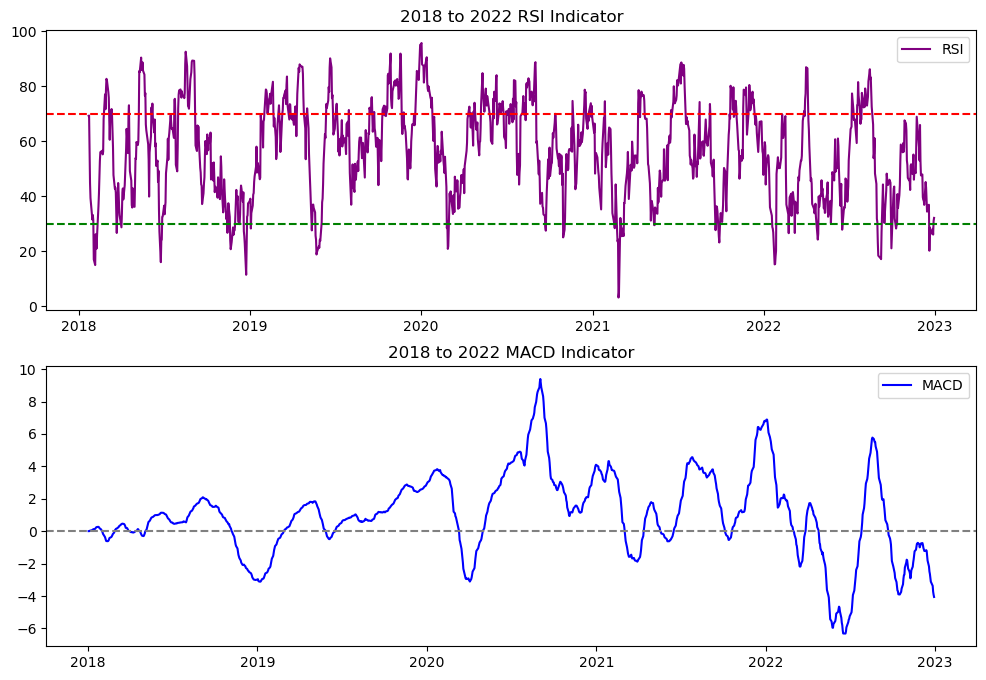

In [15]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(df.index, df["RSI"], label="RSI", color="purple")
plt.axhline(70, linestyle="--", color="red")  # Overbought level
plt.axhline(30, linestyle="--", color="green")  # Oversold level
plt.legend()
plt.title("2018 to 2022 RSI Indicator")

plt.subplot(2, 1, 2)
plt.plot(df.index, df["MACD"], label="MACD", color="blue")
plt.axhline(0, linestyle="--", color="gray")  # MACD zero-line
plt.legend()
plt.title("2018 to 2022 MACD Indicator")

plt.savefig('2018 to 2022 RSI & MACD Indicator', dpi=300, bbox_inches='tight')

plt.show()

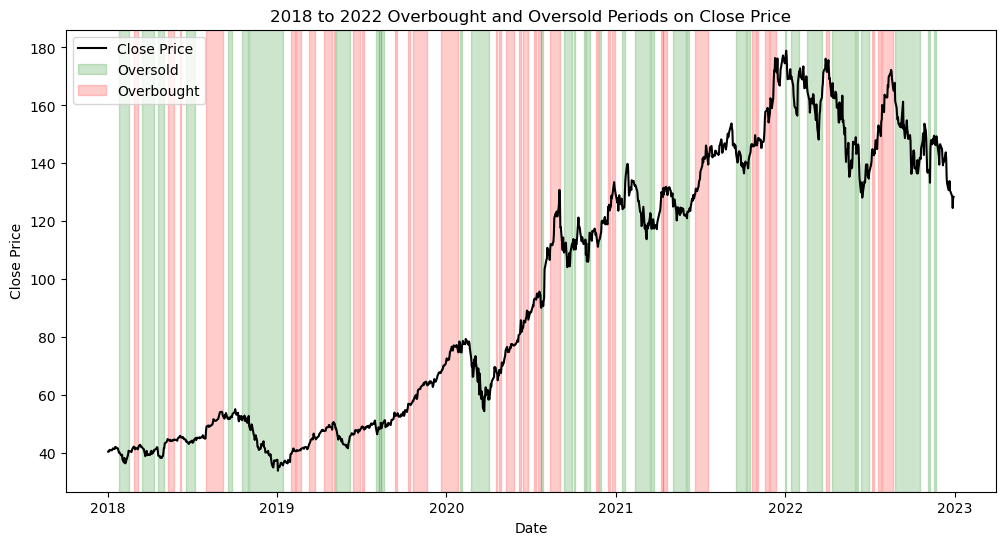

In [16]:
def find_rsi_extremes(df, min_period=3, overbought_threshold=70, oversold_threshold=30):
    """
    Identify overbought and oversold periods based on RSI.
    Both overbought and oversold periods must last more than the minimum period threshold to be counted.
    """
    rsi_periods = []
    in_extreme = False
    start_date = None
    extreme_type = None  # 'Overbought' or 'Oversold'
    
    for i in range(1, len(df)):
        if df['RSI'].iloc[i] > overbought_threshold and df['RSI'].iloc[i-1] <= overbought_threshold:
            start_date = df.index[i]
            in_extreme = True
            extreme_type = 'Overbought'
        elif df['RSI'].iloc[i] < oversold_threshold and df['RSI'].iloc[i-1] >= oversold_threshold:
            start_date = df.index[i]
            in_extreme = True
            extreme_type = 'Oversold'
        elif ((df['RSI'].iloc[i] <= overbought_threshold and extreme_type == 'Overbought') or 
              (df['RSI'].iloc[i] >= oversold_threshold and extreme_type == 'Oversold')) and in_extreme:
            end_date = df.index[i]
            if (end_date - start_date).days >= min_period:
                rsi_periods.append((start_date, end_date, extreme_type))
            in_extreme = False
    
    rsi_df = pd.DataFrame(rsi_periods, columns=['Start Date', 'End Date', 'Condition'])
    return rsi_df

def plot_rsi_extremes(df, min_period=3, overbought_threshold=70, oversold_threshold=30, title="2018 to 2022 Overbought and Oversold Periods on Close Price"):
    """
    Plot overbought and oversold periods on the 'Close' price chart.
    """
    rsi_df = find_rsi_extremes(df, min_period, overbought_threshold, oversold_threshold)
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(df.index, df['Close'], label="Close Price", color="black")
    
    # Highlight overbought and oversold periods
    for i, row in rsi_df.iterrows():
        color = 'red' if row['Condition'] == 'Overbought' else 'green'
        ax.axvspan(row['Start Date'], row['End Date'], color=color, alpha=0.2, label=row['Condition'] if i == 0 or i == 1 else "")
    
    ax.legend()
    ax.set_title(title)
    ax.set_xlabel("Date")
    ax.set_ylabel("Close Price")
    plt.savefig(title, dpi=300, bbox_inches='tight')
    plt.show()
    return rsi_df

extremas_df_rsi = plot_rsi_extremes(df, min_period=3, overbought_threshold=70, oversold_threshold=50)

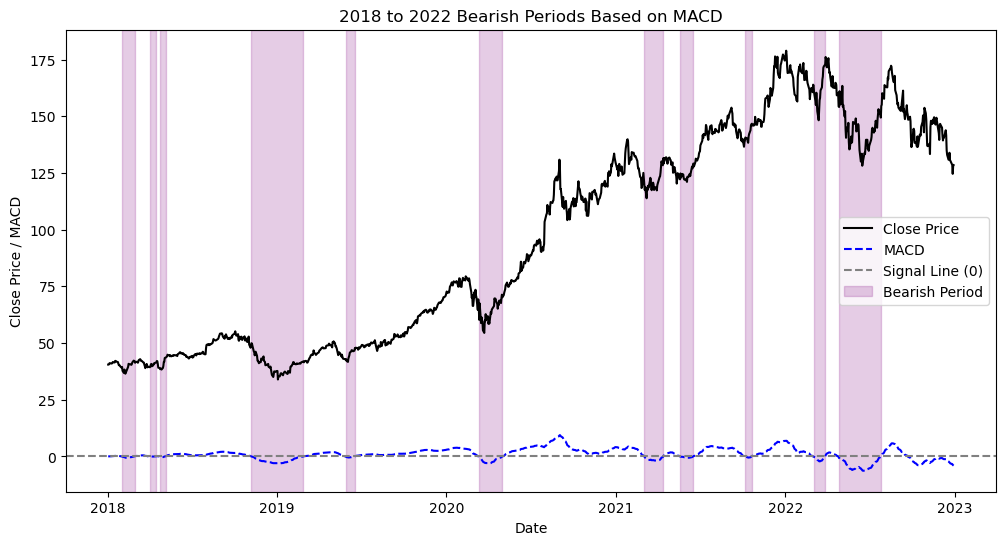

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

def find_extrema(df, column_name, window=30, n=5):
    """
    Identify local maxima and minima in a rolling window and also find 
    the top n maximum and minimum values across the entire column.
    """
    local_max_indices = []
    local_min_indices = []

    # Iterate over rolling windows
    for i in range(0, len(df) - window + 1, window):
        window_data = df[column_name].iloc[i : i + window]

        # Identify local max and min within the window
        local_max_idx = window_data.idxmax()
        local_min_idx = window_data.idxmin()

        # Store indices
        local_max_indices.append(local_max_idx)
        local_min_indices.append(local_min_idx)

    # Find the top n global max and min values
    top_n_max = df.nlargest(n, column_name).index.tolist()
    top_n_min = df.nsmallest(n, column_name).index.tolist()

    return local_max_indices, local_min_indices, top_n_max, top_n_min

def find_bearish_periods_MACD(df, signal_line=0, min_period=3):
    """
    Identify bearish periods based on MACD crossing below the signal line.
    The MACD column should exist in the input dataframe.
    """
    df['Signal'] = df['MACD'] > signal_line
    
    bearish_periods = []
    in_bearish = False
    start_date = None
    last_end_date = None
    
    for i in range(1, len(df)):
        if not df['Signal'].iloc[i] and df['Signal'].iloc[i-1]:  # MACD crosses below signal line (bearish start)
            if last_end_date and (df.index[i] - last_end_date).days < min_period:
                # If the non-bearish period is too short, merge the bearish periods
                bearish_periods[-1] = (bearish_periods[-1][0], df.index[i])
            else:
                start_date = df.index[i]
                in_bearish = True
        elif df['Signal'].iloc[i] and not df['Signal'].iloc[i-1] and in_bearish:  # MACD crosses above signal line (bearish end)
            end_date = df.index[i]
            if (end_date - start_date).days >= min_period:  # Ensure bearish period is valid
                bearish_periods.append((start_date, end_date))
                last_end_date = end_date
            in_bearish = False
    
    bearish_df = pd.DataFrame(bearish_periods, columns=['Start Date', 'End Date'])
    return bearish_df

def plot_bearish_periods_MACD(df, signal_line=0, title="2018 to 2022 Bearish Periods Based on MACD"):
    """
    Plot bearish periods based on MACD on a price chart.
    """
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(df.index, df['Close'], label="Close Price", color="black")
    ax.plot(df.index, df['MACD'], label="MACD", color="blue", linestyle="--")
    ax.axhline(signal_line, color='gray', linestyle='--', label=f'Signal Line ({signal_line})')
    
    bearish_df = find_bearish_periods_MACD(df, signal_line)
    
    # Highlight bearish periods
    for i, row in bearish_df.iterrows():
        ax.axvspan(row['Start Date'], row['End Date'], color='purple', alpha=0.2, label='Bearish Period' if i == 0 else "")
    
    # Labels and legend
    ax.legend()
    ax.set_title(title)
    ax.set_xlabel("Date")
    ax.set_ylabel("Close Price / MACD")
    plt.savefig(title, dpi=300, bbox_inches='tight')
    plt.show()
    return bearish_df

bearish_df_macd = plot_bearish_periods_MACD(df)

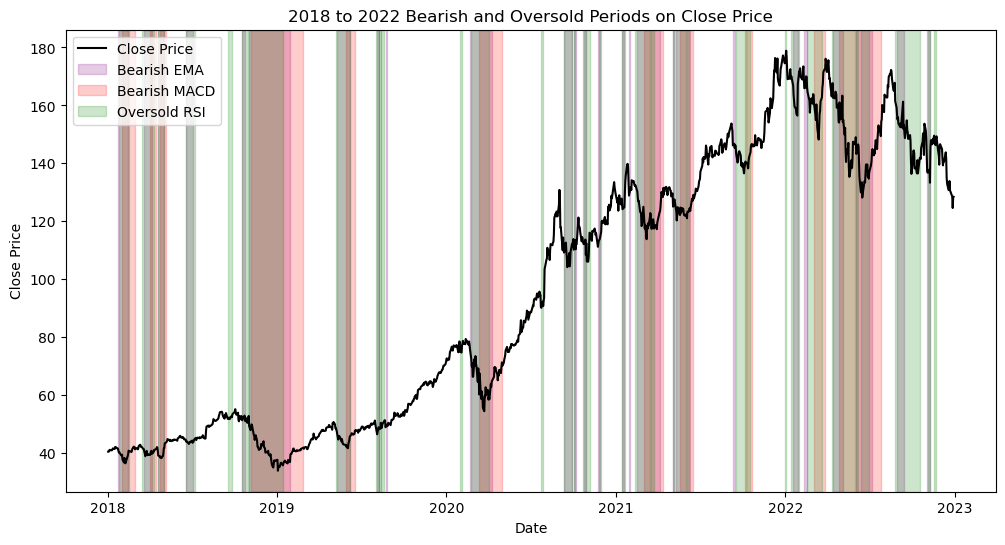

In [18]:
# Extract oversold periods from extremas_df_rsi
oversold_df = extremas_df_rsi[extremas_df_rsi["Condition"] == "Oversold"][["Start Date", "End Date"]]

# Plot Close Price
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df.index, df['Close'], label="Close Price", color="black")

# Highlight bearish periods from bearish_df_ema
for i, row in bearish_df_ema.iterrows():
    ax.axvspan(row['Start Date'], row['End Date'], color='purple', alpha=0.2, label='Bearish EMA' if i == 0 else "")

# Highlight bearish periods from bearish_df_MACD
for i, row in bearish_df_macd.iterrows():
    ax.axvspan(row['Start Date'], row['End Date'], color='red', alpha=0.2, label='Bearish MACD' if i == 0 else "")

# Highlight oversold periods from the modified extremas_df_rsi
for i, row in oversold_df.iterrows():
    ax.axvspan(row['Start Date'], row['End Date'], color='green', alpha=0.2, label='Oversold RSI' if i == 0 else "")

# Labels and legend
ax.legend()
title = "2018 to 2022 Bearish and Oversold Periods on Close Price"
ax.set_title(title)
ax.set_xlabel("Date")
ax.set_ylabel("Close Price")
plt.savefig(title, dpi=300, bbox_inches='tight')
# Show plot
plt.show()

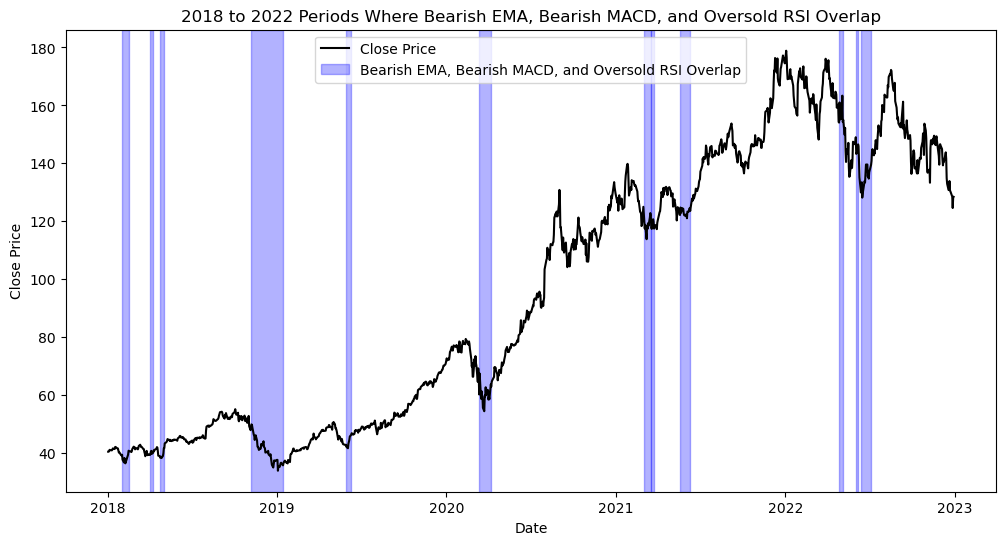

In [19]:
def create_overlap_matrix(df, dataframes, names):
    """
    Create a binary matrix where each column represents a condition (bearish period from different dataframes).
    The rows are indexed by date from the main dataframe, marking periods between start and end dates as 1.
    
    Parameters:
    - df: Main dataframe with dates as index
    - dataframes: List of dataframes with "Start Date" and "End Date" columns
    - names: List of column names corresponding to the given dataframes
    
    Returns:
    - A binary dataframe indicating the presence of conditions over time.
    """
    overlap_matrix = pd.DataFrame(0, index=df.index, columns=names)  # Initialize with zeros
    
    for col_name, period_df in zip(names, dataframes):
        for _, row in period_df.iterrows():
            overlap_matrix.loc[row["Start Date"]:row["End Date"], col_name] = 1  # Mark periods as 1
    
    return overlap_matrix

def find_full_overlapping_periods(overlap_matrix):
    """
    Identify periods where all columns in the overlap matrix are marked as 1 (full overlap).
    
    Parameters:
    - overlap_matrix: A binary dataframe indicating the presence of conditions over time.
    
    Returns:
    - A dataframe with "Start Date" and "End Date" columns representing full overlap periods.
    """
    overlap_matrix["Overlap"] = overlap_matrix.all(axis=1).astype(int)  # 1 if all conditions are met
    
    overlapping_periods = []
    in_overlap = False
    start_date = None
    
    for date, value in overlap_matrix["Overlap"].items():
        if value == 1 and not in_overlap:
            start_date = date
            in_overlap = True
        elif value == 0 and in_overlap:
            end_date = date
            overlapping_periods.append((start_date, end_date))
            in_overlap = False
    
    return pd.DataFrame(overlapping_periods, columns=["Start Date", "End Date"])

# Create overlap matrix
names = ["Bearish EMA", "Bearish MACD", "Oversold RSI"]
overlap_matrix = create_overlap_matrix(df, [bearish_df_ema, bearish_df_macd, oversold_df], names)

# Identify full overlap periods
full_overlap_df = find_full_overlapping_periods(overlap_matrix)

# Plot overlapping periods
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df.index, df['Close'], label="Close Price", color="black")

# Highlight full overlap periods
for _, row in full_overlap_df.iterrows():
    ax.axvspan(row["Start Date"], row["End Date"], color='blue', alpha=0.3, label="Bearish EMA, Bearish MACD, and Oversold RSI Overlap" if _ == 0 else "")

# Labels and legend
ax.legend()
title = "2018 to 2022 Periods Where Bearish EMA, Bearish MACD, and Oversold RSI Overlap"
ax.set_title(title)
ax.set_xlabel("Date")
ax.set_ylabel("Close Price")

plt.savefig(title, dpi=300, bbox_inches='tight')
# Show plot
plt.show()

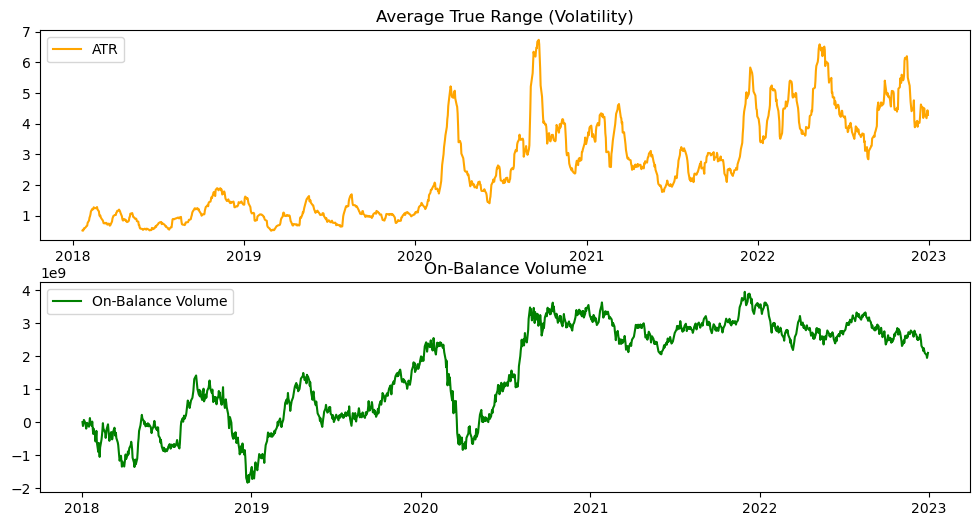

In [20]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(df.index, df["ATR"], label="ATR", color="orange")
plt.legend()
plt.title("Average True Range (Volatility)")

plt.subplot(2, 1, 2)
plt.plot(df.index, df["OBV"], label="On-Balance Volume", color="green")
plt.legend()
plt.title("On-Balance Volume")

plt.savefig('2018 to 2022 ATR and OBV', dpi=300, bbox_inches='tight')
plt.show()

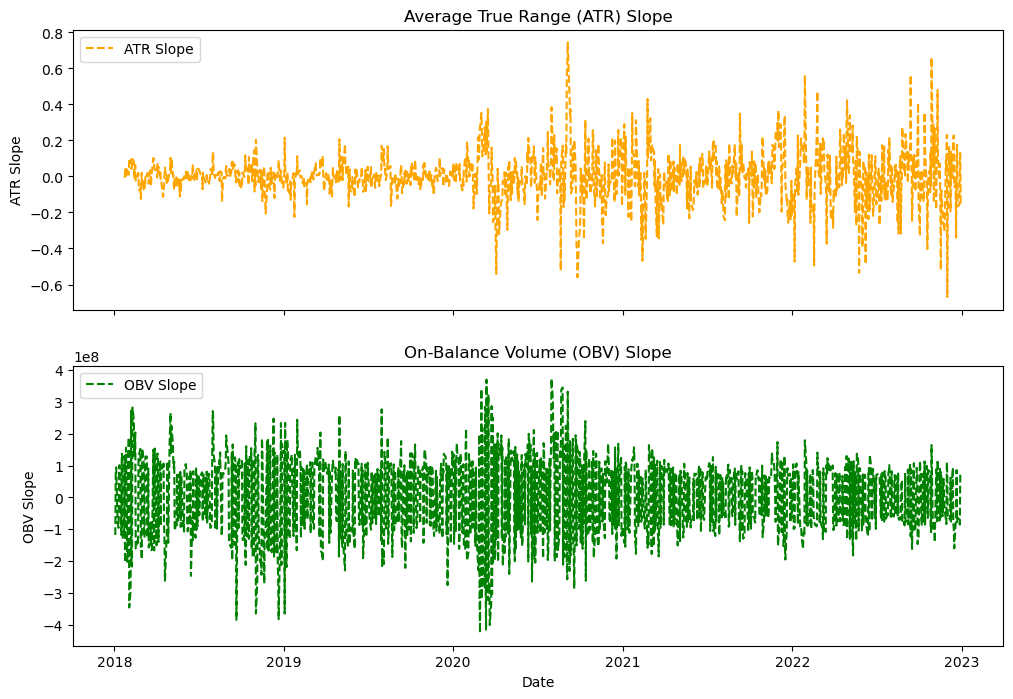

In [21]:
df['ATR Slope'] = df['ATR'].diff()
df['OBV Slope'] = df['OBV'].diff()

fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
    
# Plot ATR and its slope
axes[0].plot(df.index, df["ATR Slope"], label="ATR Slope", color="orange", linestyle="--")
axes[0].set_ylabel("ATR Slope")
axes[0].legend(loc="upper left")
axes[0].set_title("Average True Range (ATR) Slope")

# Plot OBV and its slope
axes[1].plot(df.index, df["OBV Slope"], label="OBV Slope", color="green", linestyle="--")
axes[1].set_ylabel("OBV Slope")
axes[1].legend(loc="upper left")
axes[1].set_title("On-Balance Volume (OBV) Slope")

plt.xlabel("Date")
plt.savefig('2018 to 2022 ATR and OBV Slope', dpi=300, bbox_inches='tight')
plt.show()

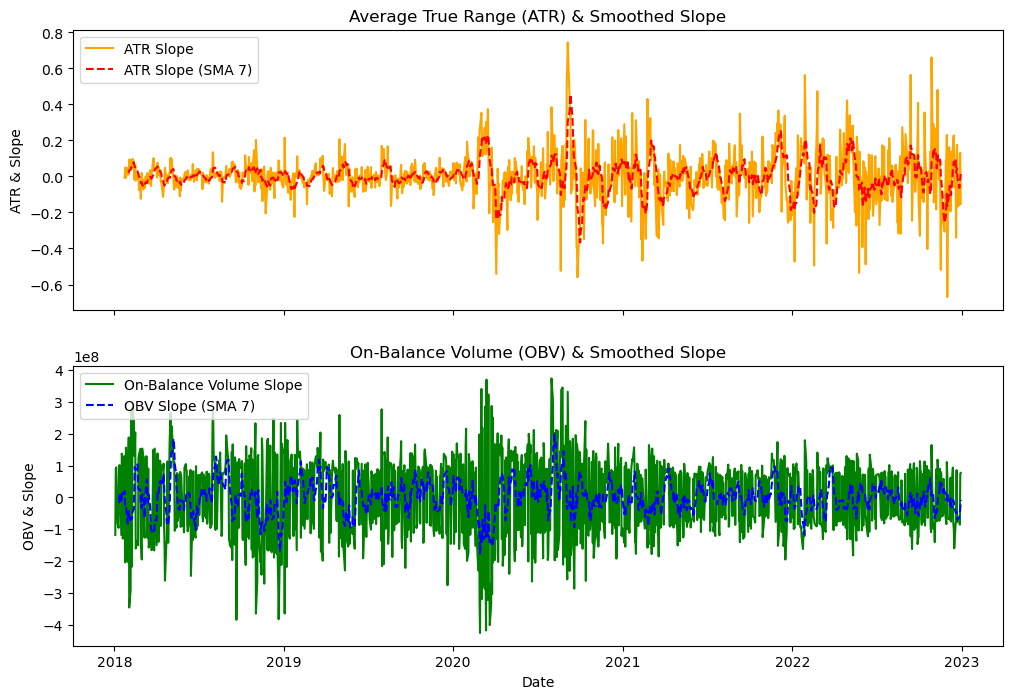

In [22]:
# Smooth the slopes using a 30-row simple moving average (SMA)
df['ATR Slope Smoothed'] = df['ATR Slope'].rolling(window=7).mean()
df['OBV Slope Smoothed'] = df['OBV Slope'].rolling(window=7).mean()

fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot ATR and its smoothed slope
axes[0].plot(df.index, df["ATR Slope"], label="ATR Slope", color="orange")
axes[0].plot(df.index, df["ATR Slope Smoothed"], label="ATR Slope (SMA 7)", color="red", linestyle="--")
axes[0].set_ylabel("ATR & Slope")
axes[0].legend(loc="upper left")
axes[0].set_title("Average True Range (ATR) & Smoothed Slope")

# Plot OBV and its smoothed slope
axes[1].plot(df.index, df["OBV Slope"], label="On-Balance Volume Slope", color="green")
axes[1].plot(df.index, df["OBV Slope Smoothed"], label="OBV Slope (SMA 7)", color="blue", linestyle="--")
axes[1].set_ylabel("OBV & Slope")
axes[1].legend(loc="upper left")
axes[1].set_title("On-Balance Volume (OBV) & Smoothed Slope")

plt.xlabel("Date")
plt.savefig('2018 to 2022 ATR and OBV Slope & Smoothed Slope', dpi=300, bbox_inches='tight')
plt.show()

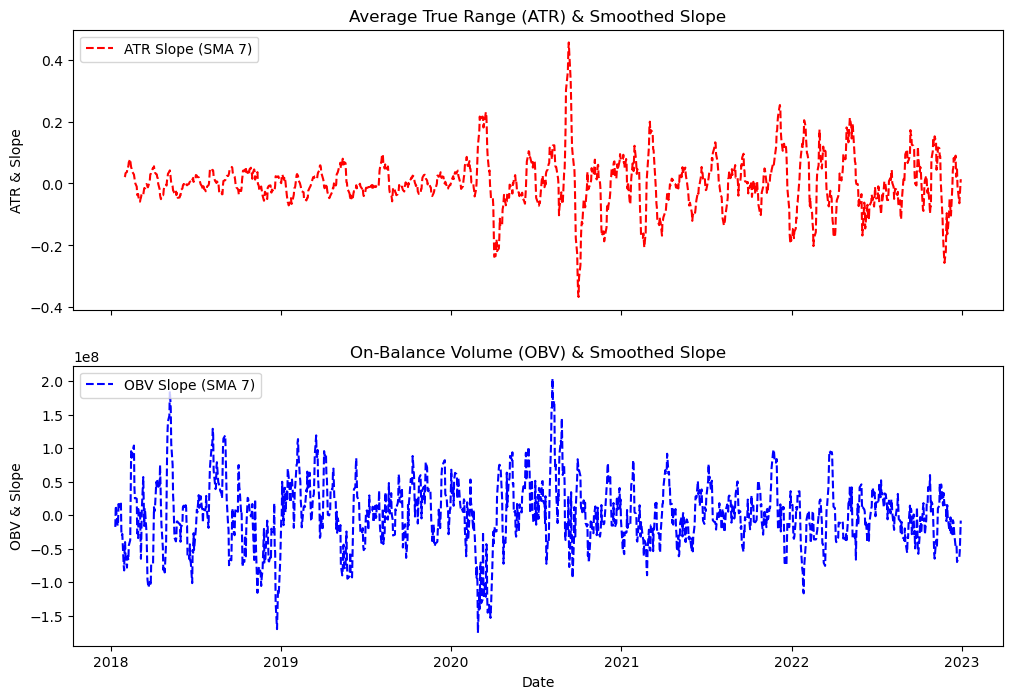

In [23]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot ATR and its smoothed slope
axes[0].plot(df.index, df["ATR Slope Smoothed"], label="ATR Slope (SMA 7)", color="red", linestyle="--")
axes[0].set_ylabel("ATR & Slope")
axes[0].legend(loc="upper left")
axes[0].set_title("Average True Range (ATR) & Smoothed Slope")

# Plot OBV and its smoothed slope
axes[1].plot(df.index, df["OBV Slope Smoothed"], label="OBV Slope (SMA 7)", color="blue", linestyle="--")
axes[1].set_ylabel("OBV & Slope")
axes[1].legend(loc="upper left")
axes[1].set_title("On-Balance Volume (OBV) & Smoothed Slope")

plt.xlabel("Date")
plt.savefig('2018 to 2022 ATR and OBV Smoothed Slope', dpi=300, bbox_inches='tight')
plt.show()

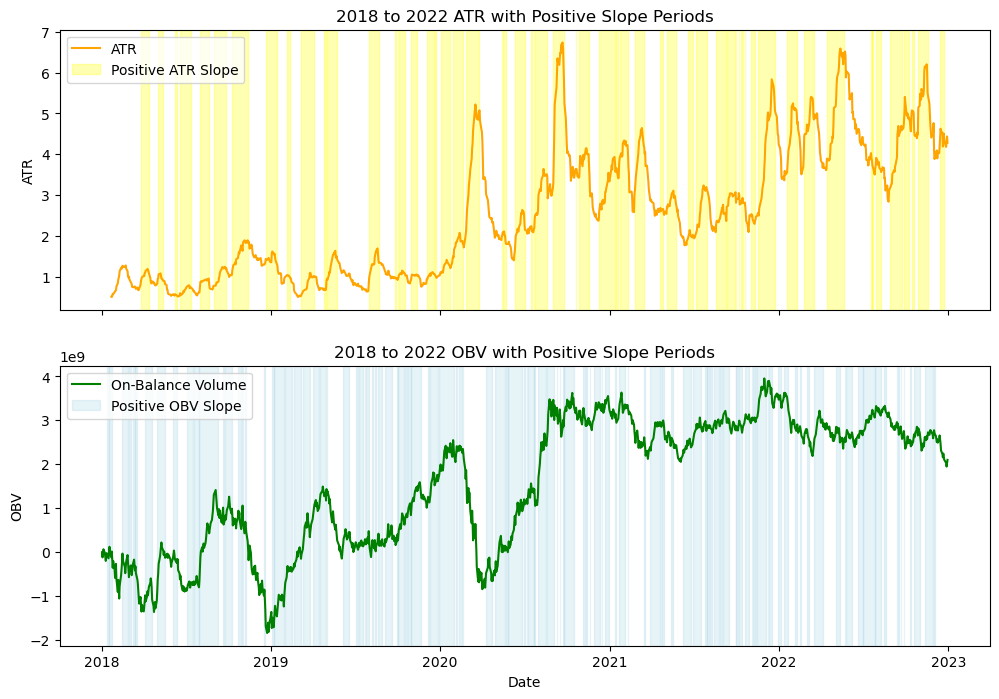

In [24]:
# Function to find positive slope periods
def find_positive_slope_periods(df, column_name):
    positive_periods = []
    in_positive = False
    start_date = None
    
    for i in range(1, len(df)):
        if df[column_name].iloc[i] > 0 and df[column_name].iloc[i-1] <= 0:
            start_date = df.index[i]
            in_positive = True
        elif df[column_name].iloc[i] <= 0 and df[column_name].iloc[i-1] > 0 and in_positive:
            end_date = df.index[i]
            positive_periods.append((start_date, end_date))
            in_positive = False
    
    return pd.DataFrame(positive_periods, columns=['Start Date', 'End Date'])


# Find positive slope periods for ATR Slope and OBV Slope
atr_positive_periods = find_positive_slope_periods(df, "ATR Slope Smoothed")
obv_positive_periods = find_positive_slope_periods(df, "OBV Slope Smoothed")

# Plot ATR and OBV with highlighted positive slope periods
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot ATR
axes[0].plot(df.index, df["ATR"], label="ATR", color="orange")
for _, row in atr_positive_periods.iterrows():
    axes[0].axvspan(row['Start Date'], row['End Date'], color='yellow', alpha=0.3, label="Positive ATR Slope" if _ == 0 else "")
axes[0].set_ylabel("ATR")
axes[0].legend()
axes[0].set_title("2018 to 2022 ATR with Positive Slope Periods")

# Plot OBV
axes[1].plot(df.index, df["OBV"], label="On-Balance Volume", color="green")
for _, row in obv_positive_periods.iterrows():
    axes[1].axvspan(row['Start Date'], row['End Date'], color='lightblue', alpha=0.3, label="Positive OBV Slope" if _ == 0 else "")
axes[1].set_ylabel("OBV")
axes[1].legend()
axes[1].set_title("2018 to 2022 OBV with Positive Slope Periods")

plt.savefig('2018 to 2022 ATR and OBV Smoothed Slope', dpi=300, bbox_inches='tight')
plt.xlabel("Date")
plt.show()

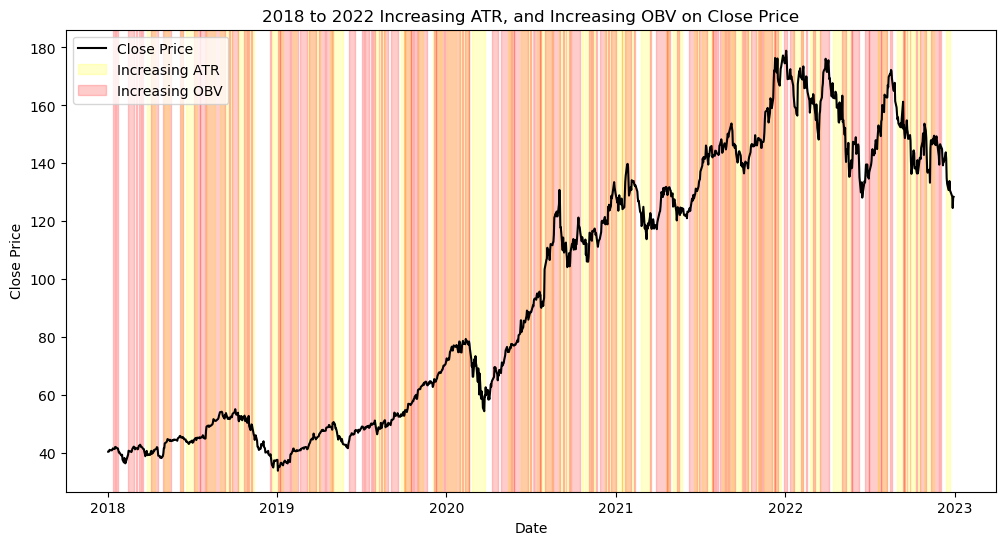

In [25]:
# Plot Close Price
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df.index, df['Close'], label="Close Price", color="black")

# Highlight bearish periods from bearish_df_MACD
for i, row in atr_positive_periods.iterrows():
    ax.axvspan(row['Start Date'], row['End Date'], color='yellow', alpha=0.2, label='Increasing ATR' if i == 0 else "")

# Highlight oversold periods from the modified extremas_df_rsi
for i, row in obv_positive_periods.iterrows():
    ax.axvspan(row['Start Date'], row['End Date'], color='red', alpha=0.2, label='Increasing OBV' if i == 0 else "")

# Labels and legend
ax.legend()

title = "2018 to 2022 Increasing ATR, and Increasing OBV on Close Price"
ax.set_title(title)
ax.set_xlabel("Date")
ax.set_ylabel("Close Price")

plt.savefig(title, dpi=300, bbox_inches='tight')
# Show plot
plt.show()

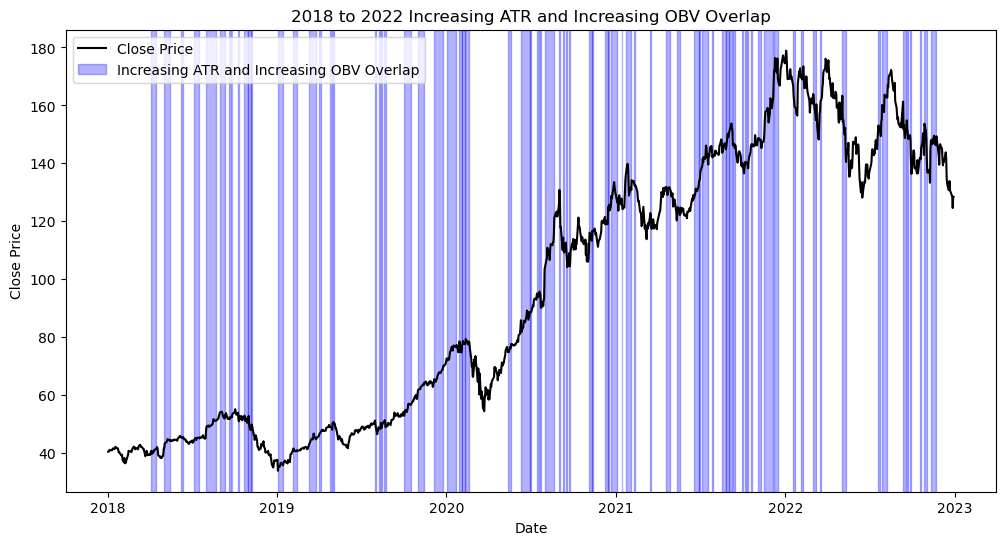

In [27]:
# Create overlap matrix
names = ["Increasing ATR", "Increasing OBV"]
overlap_matrix2 = create_overlap_matrix(df, [atr_positive_periods, obv_positive_periods], names)

# Identify full overlap periods
full_overlap_df2 = find_full_overlapping_periods(overlap_matrix2)

# Plot overlapping periods
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df.index, df['Close'], label="Close Price", color="black")

# Highlight full overlap periods
for _, row in full_overlap_df2.iterrows():
    ax.axvspan(row["Start Date"], row["End Date"], color='blue', alpha=0.3, label="Increasing ATR and Increasing OBV Overlap" if _ == 0 else "")

# Labels and legend
ax.legend()

title = "2018 to 2022 Increasing ATR and Increasing OBV Overlap"
ax.set_title(title)
ax.set_xlabel("Date")
ax.set_ylabel("Close Price")

plt.savefig(title, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

## Compute distance metrics to quantify similarity:

1. Mean Absolute Difference (MAD) → Computes the average absolute difference.

2. Mean Squared Difference (MSE) → Penalizes larger deviations.

3. Correlation Coefficient → Measures how closely two time series move together.

In [12]:
def compute_technical_indicators(data_frames1):
    # Extract necessary DataFrames
    close_prices = close_df
    high_prices = data_frames1["High"]
    low_prices = data_frames1["Low"]
    volume_data = data_frames1["Volume"]

    # Compute indicators
    ema = calculate_ema(close_prices)
    rsi = calculate_rsi(close_prices)
    macd = calculate_macd(close_prices)
    atr = calculate_atr(close_prices, high_prices, low_prices)
    obv = calculate_obv(close_prices, volume_data)

    # Store in a dictionary
    indicators_dict = {
        "Exponential Moving Average (EMA)": ema,
        "Relative Strength Index (RSI)": rsi,
        "Moving Average Convergence Divergence (MACD)": macd,
        "Average True Range (ATR)": atr,
        "On-Balance Volume (OBV)": obv
    }

    for key in indicators_dict:
        indicators_dict[key].index = pd.to_datetime(indicators_dict[key].index)

    return indicators_dict

# Compute the technical indicators dictionary
technical_indicators = compute_technical_indicators(data_frames1)

# Print keys to verify
print("Computed Technical Indicators:", list(technical_indicators.keys()))

Computed Technical Indicators: ['Exponential Moving Average (EMA)', 'Relative Strength Index (RSI)', 'Moving Average Convergence Divergence (MACD)', 'Average True Range (ATR)', 'On-Balance Volume (OBV)']


In [13]:
import pandas as pd
import numpy as np

def compute_mad(df, column_name):
    """
    Computes the Mean Absolute Difference (MAD) between the specified column and all other columns.
    """
    mad_values = df.apply(lambda col: np.mean(np.abs(df[column_name] - col)), axis=0)
    result_df = pd.DataFrame({"Column": df.columns, "MAD": mad_values}).reset_index(drop=True)
    
    # Check that MAD between the column and itself is 0
    assert mad_values[column_name] == 0, "MAD between the column and itself should be 0"
    
    return result_df


def compute_mse(df, column_name):
    """
    Computes the Mean Squared Error (MSE) between the specified column and all other columns.
    """
    mse_values = df.apply(lambda col: np.mean((df[column_name] - col) ** 2), axis=0)
    result_df = pd.DataFrame({"Column": df.columns, "MSE": mse_values}).reset_index(drop=True)
    
    # Check that MSE between the column and itself is 0
    assert mse_values[column_name] == 0, "MSE between the column and itself should be 0"
    
    return result_df


def compute_correlation(df, column_name):
    """
    Computes the Pearson correlation coefficient between the specified column and all other columns.
    """
    correlation_values = df.corrwith(df[column_name])
    result_df = pd.DataFrame({"Column": df.columns, "Correlation": correlation_values}).reset_index(drop=True)
    # print(correlation_values[column_name])
    
    return result_df

In [14]:
# Compute correlation using AAPL as the reference column
correlation_df = compute_correlation(close_df, "Apple Inc.")

# Print the correlation values for AAPL
aapl_correlation = correlation_df[correlation_df["Column"] == "Apple Inc."]
print("Correlation of AAPL with itself:\n", aapl_correlation)

Correlation of AAPL with itself:
        Column  Correlation
0  Apple Inc.          1.0


In [15]:
def top_n_mad(df, column_name, top_n):
    mad_df = compute_mad(df, column_name)
    mad_df_sorted = mad_df.nsmallest(top_n, "MAD")  # Select top n smallest MAD values
    return df[mad_df_sorted["Column"].values]  # Return filtered DataFrame


def top_n_mse(df, column_name, top_n):
    mse_df = compute_mse(df, column_name)
    mse_df_sorted = mse_df.nsmallest(top_n, "MSE")  # Select top n smallest MSE values
    return df[mse_df_sorted["Column"].values]  # Return filtered DataFrame


def top_n_correlation(df, column_name, top_n):

    correlation_df = compute_correlation(df, column_name)
    correlation_df_sorted = correlation_df.nlargest(top_n, "Correlation")  # Select top n largest correlations
    selected_columns = correlation_df_sorted["Column"].values

    # Filter the DataFrame to keep only the selected columns
    result_df = df[selected_columns]

    # Drop the '^GSPC' column if it exists
    result_df = result_df.drop(columns=["^GSPC"], errors="ignore")

    return result_df


# ==== Test the Functions on `close_df` ====
column_to_compare = "Apple Inc."  # Example: Compare with Apple
top_n = 10  # Get top 10 closest companies

top_mad_df = top_n_mad(close_df, column_to_compare, top_n)
top_mse_df = top_n_mse(close_df, column_to_compare, top_n)
top_correlation_df = top_n_correlation(close_df, column_to_compare, top_n)

# Print the column names in the resulting DataFrames
print("Top 10 companies by MAD:\n", top_mad_df.columns)
print("Top 10 companies by MSE:\n", top_mse_df.columns)
print("Top 10 companies by Correlation:\n", top_correlation_df.columns)

Top 10 companies by MAD:
 Index(['Apple Inc.', 'Cadence Design Systems', 'Qualcomm', 'Teradyne',
       'Keysight Technologies', 'Applied Materials', 'TE Connectivity',
       'Analog Devices', 'PTC Inc.', 'CDW Corporation'],
      dtype='object')
Top 10 companies by MSE:
 Index(['Apple Inc.', 'Cadence Design Systems', 'Qualcomm',
       'Keysight Technologies', 'Teradyne', 'TE Connectivity',
       'Applied Materials', 'Analog Devices', 'PTC Inc.',
       'Akamai Technologies'],
      dtype='object')
Top 10 companies by Correlation:
 Index(['Apple Inc.', 'Synopsys', 'Microsoft', 'Cadence Design Systems',
       'Monolithic Power Systems', 'KLA Corporation', 'Broadcom', 'Qualcomm',
       'Accenture', 'Amphenol'],
      dtype='object')


## Visualize Technical Indicators

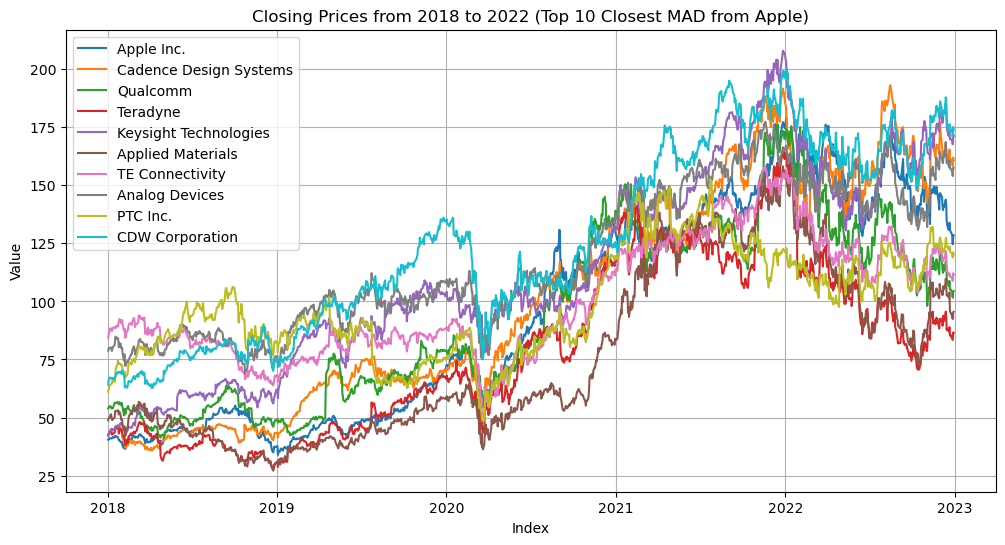

In [16]:
import matplotlib.pyplot as plt

def plot_dataframe(df, title="Nameless Plot"):
    plt.figure(figsize=(12, 6))  # Set figure size

    df.index = pd.to_datetime(df.index)

    for col in df.columns:
        plt.plot(df.index, df[col], label=col)  # Plot each column
    
    plt.title(title)  # Set title
    plt.xlabel("Index")  # X-axis label
    plt.ylabel("Value")  # Y-axis label
    plt.legend()  # Show legend
    plt.grid(True)  # Enable grid
    plt.savefig(title, dpi=300, bbox_inches='tight')
    plt.show()  # Display plot

plot_dataframe(top_mad_df, 'Closing Prices from 2018 to 2022 (Top 10 Closest MAD from Apple)')

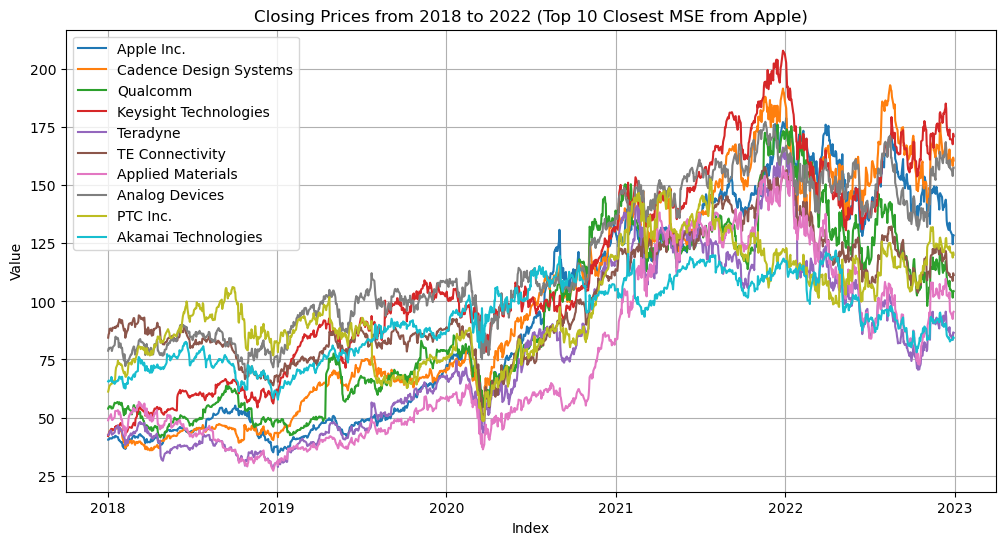

In [17]:
plot_dataframe(top_mse_df, 'Closing Prices from 2018 to 2022 (Top 10 Closest MSE from Apple)')

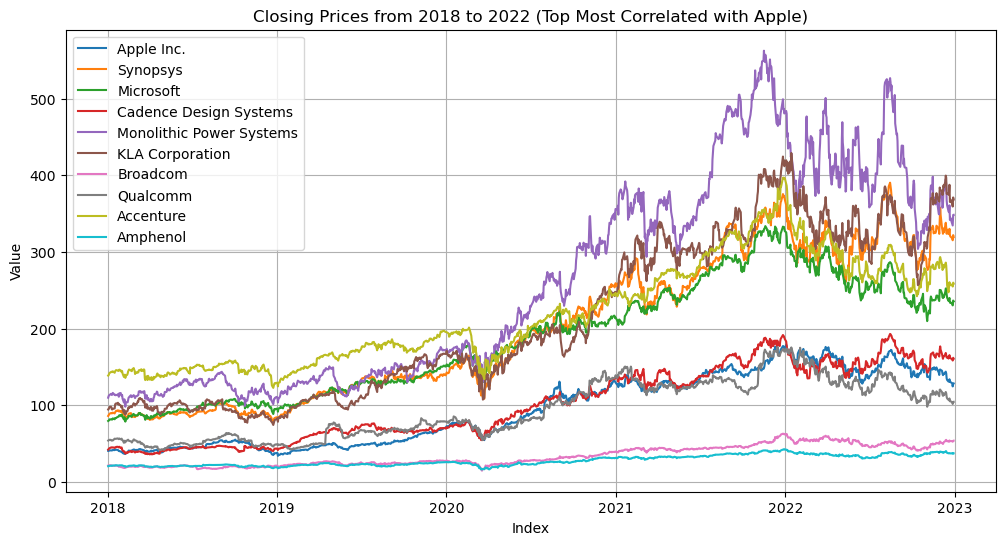

In [18]:
plot_dataframe(top_correlation_df, 'Closing Prices from 2018 to 2022 (Top Most Correlated with Apple)')

### Conclusion:

I will use MAD from now on.

In [19]:
tech_ind = list(technical_indicators.keys())

print(tech_ind)

['Exponential Moving Average (EMA)', 'Relative Strength Index (RSI)', 'Moving Average Convergence Divergence (MACD)', 'Average True Range (ATR)', 'On-Balance Volume (OBV)']


In [25]:
def top_n_cols(df, column_name, top_n):
    """
    Computes MAD for all columns and returns a DataFrame with the top n highest MAD values 
    compared to the minimum value in each column. Ensures the input column is included.
    """
    mad_df = compute_mad(df, column_name)

    # Compute MAD relative to the minimum value in each column
    min_values = df.min()  # Get the minimum value for each column
    mad_from_min = df.sub(min_values).abs().mean(axis=0)

    # Store MAD compared to the minimum in a new column
    mad_df["MAD_from_min"] = mad_from_min.values

    # Select top n greatest MAD values
    mad_df_sorted = mad_df.nlargest(top_n, "MAD_from_min")

    # Ensure the input column is included
    if column_name not in mad_df_sorted["Column"].values:
        mad_df_sorted = pd.concat([mad_df_sorted, mad_df[mad_df["Column"] == column_name]]).drop_duplicates()

    return df[mad_df_sorted["Column"].values]  # Return filtered DataFrame

In [26]:
column_to_compare = "Apple Inc."  # Example: Compare with Apple
top_n = 10  # Get top 10 companies

top_10_df = top_n_cols(close_df, column_to_compare, top_n)

print("Top 10 companies by Correlation:\n", top_10_df.columns)

Top 10 companies by Correlation:
 Index(['ServiceNow', 'Fair Isaac', 'Adobe Inc.', 'Zebra Technologies',
       'EPAM Systems', 'Intuit', 'Monolithic Power Systems',
       'Tyler Technologies', 'Teledyne Technologies', 'KLA Corporation',
       'Apple Inc.'],
      dtype='object')


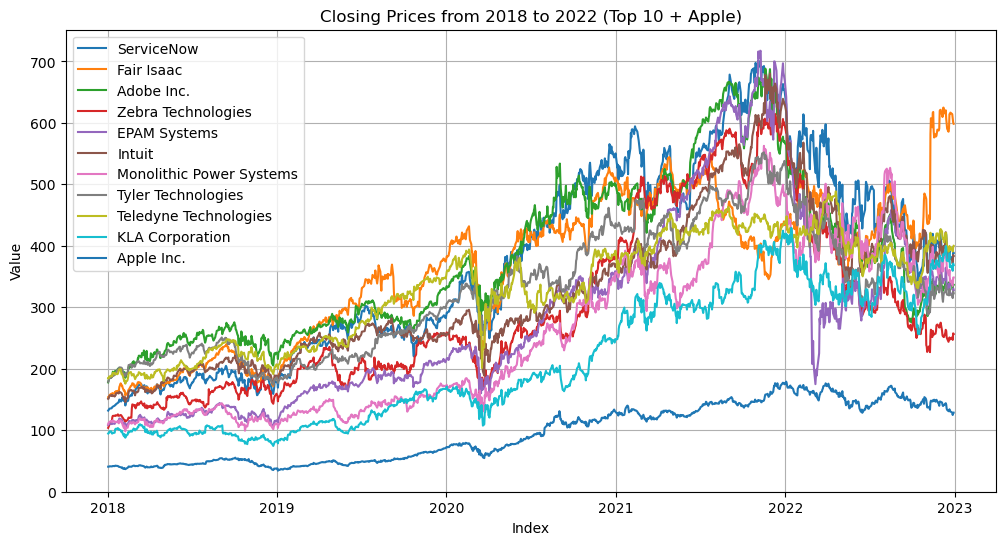

In [27]:
plot_dataframe(top_10_df, 'Closing Prices from 2018 to 2022 (Top 10 + Apple)')

In [20]:
t1 = tech_ind[0]
t2 = tech_ind[1]
t3 = tech_ind[2]
t4 = tech_ind[3]
t5 = tech_ind[4]

ema_df = technical_indicators[t1]
rsi_df = technical_indicators[t2]
macd_df = technical_indicators[t3]
atr_df = technical_indicators[t4]
obv_df = technical_indicators[t5]

column_to_compare = "Apple Inc."  # Example: Compare with Apple
top_n = 10  # Get top 10 closest companies

top_10_ema_df = top_n_mad(ema_df, column_to_compare, top_n)

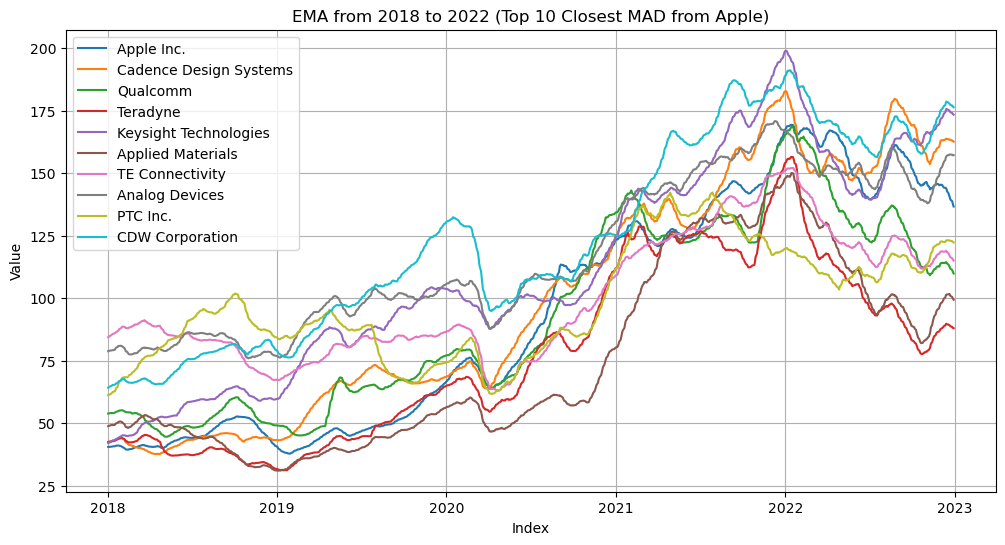

In [21]:
plot_dataframe(top_10_ema_df, 'EMA from 2018 to 2022 (Top 10 Closest MAD from Apple)')

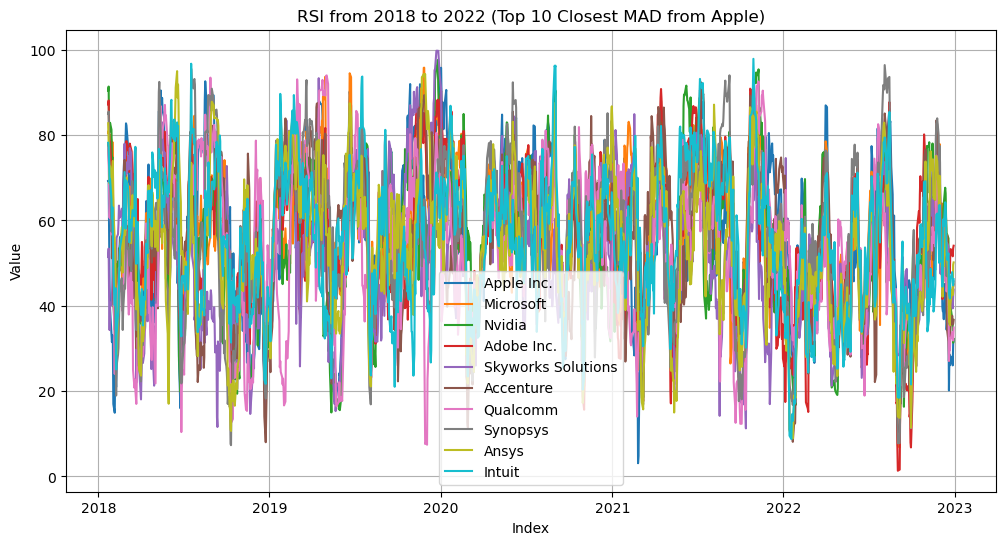

In [28]:
column_to_compare = "Apple Inc."  # Example: Compare with Apple
top_n = 10  # Get top 10 closest companies

top_10_rsi_df = top_n_mad(rsi_df, column_to_compare, top_n)

plot_dataframe(top_10_rsi_df, 'RSI from 2018 to 2022 (Top 10 Closest MAD from Apple)')

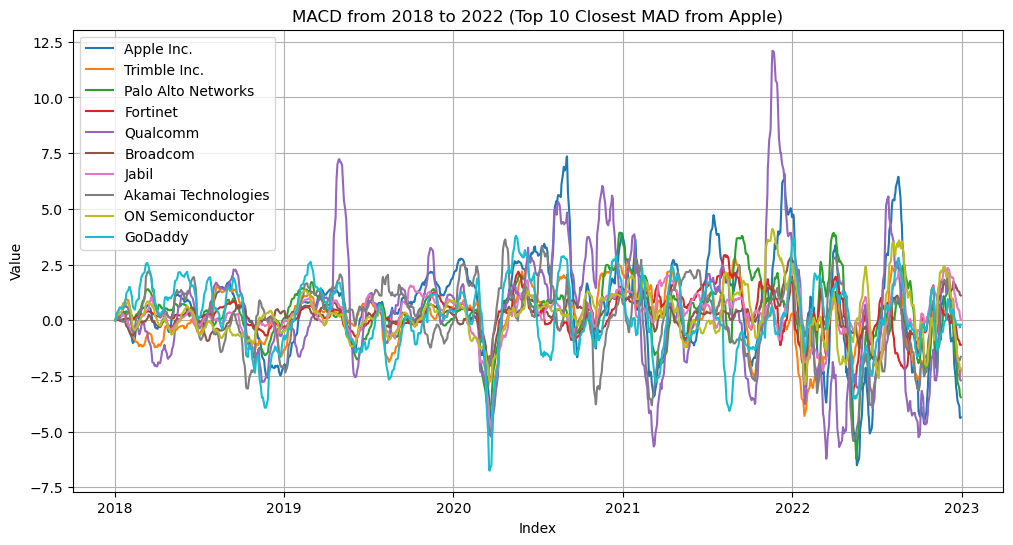

In [29]:
column_to_compare = "Apple Inc."  # Example: Compare with Apple
top_n = 10  # Get top 10 closest companies

top_10_macd_df = top_n_mad(macd_df, column_to_compare, top_n)

plot_dataframe(top_10_macd_df, 'MACD from 2018 to 2022 (Top 10 Closest MAD from Apple)')